In [37]:
import pandas as pd


In [38]:
file="dataset/AAPL.csv"
df=pd.read_csv(file)
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-13 00:00:00+00:00,191.33,191.84,190.90,191.08,12519792,45.708487,45.830325,45.605760,45.648762,50079168,0.0,1.0
1,AAPL,2018-07-16 00:00:00+00:00,190.91,192.65,190.42,191.52,15043110,45.608149,46.023833,45.491089,45.753878,60172440,0.0,1.0
2,AAPL,2018-07-17 00:00:00+00:00,191.45,191.87,189.20,189.75,15534523,45.737155,45.837492,45.199633,45.331027,62138092,0.0,1.0
3,AAPL,2018-07-18 00:00:00+00:00,190.40,191.80,189.93,191.78,16393381,45.486311,45.820769,45.374029,45.815991,65573524,0.0,1.0
4,AAPL,2018-07-19 00:00:00+00:00,191.88,192.55,189.69,189.69,20286752,45.839881,45.999943,45.316693,45.316693,81147008,0.0,1.0


In [39]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-07-05 00:00:00+00:00,191.33,192.98,190.620,191.565,46920261,191.33,192.98,190.620,191.565,46920261,0.0,1.0
1252,AAPL,2023-07-06 00:00:00+00:00,191.81,192.02,189.200,189.840,45156009,191.81,192.02,189.200,189.840,45156009,0.0,1.0
1253,AAPL,2023-07-07 00:00:00+00:00,190.68,192.67,190.240,191.410,46814998,190.68,192.67,190.240,191.410,46814998,0.0,1.0
1254,AAPL,2023-07-10 00:00:00+00:00,188.61,189.99,187.035,189.260,59922163,188.61,189.99,187.035,189.260,59922163,0.0,1.0
1255,AAPL,2023-07-11 00:00:00+00:00,188.08,189.30,186.600,189.160,46638119,188.08,189.30,186.600,189.160,46638119,0.0,1.0


In [40]:
df1=df.reset_index()['close']

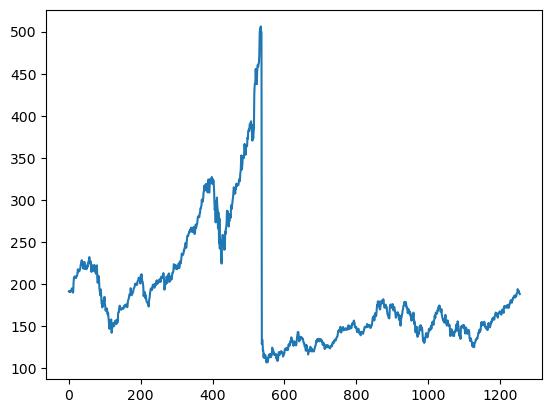

In [41]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [42]:
import numpy as np
df1

0       191.33
1       190.91
2       191.45
3       190.40
4       191.88
         ...  
1251    191.33
1252    191.81
1253    190.68
1254    188.61
1255    188.08
Name: close, Length: 1256, dtype: float64

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [44]:

training_size=int(len(df1)*0.65)#dividing test,train
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [45]:
training_size,test_size

(816, 440)

In [46]:
train_data

array([[2.11621791e-01],
       [2.10569818e-01],
       [2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],
       [2.77370069e-01],
       [2.72060113e-01],
       [2.71008140e-01],
       [2.71033187e-01],
       [2.72135254e-01],
       [2.73813400e-01],
       [2.78271760e-01],
       [2.82680025e-01],
       [2.90895429e-01],
       [2.96030056e-01],
       [3.02542267e-01],
       [3.04370695e-01],
       [3.00638698e-01],
       [2.91195992e-01],
       [2.86687539e-01],


In [47]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [48]:

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [49]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [50]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [51]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import pickle

In [53]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)
with open('model_pickle_AAPL','wb') as f:
    pickle.dump(model,f)

Epoch 1/100
12/12 [==============================] - 9s 311ms/step - loss: 0.0341 - val_loss: 9.7587e-04
Epoch 2/100
12/12 [==============================] - 2s 202ms/step - loss: 0.0160 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0113 - val_loss: 4.6323e-04
Epoch 4/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0094 - val_loss: 4.4001e-04
Epoch 5/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0104 - val_loss: 0.0029
Epoch 6/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0088 - val_loss: 6.0041e-04
Epoch 7/100
12/12 [==============================] - 3s 229ms/step - loss: 0.0081 - val_loss: 3.6629e-04
Epoch 8/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0069 - val_loss: 6.5152e-04
Epoch 9/100
12/12 [==============================] - 3s 215ms/step - loss: 0.0060 - val_loss: 3.9981e-04
Epoch 10/100
12/12 [==============================] - 3s 227ms/

In [54]:

# with open('model_pickle','rb') as f:
#     model=pickle.load(f)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [56]:
import tensorflow as tf

In [57]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 37ms/step


In [58]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [59]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.06288030827537

In [60]:
math.sqrt(mean_squared_error(y_test,test_predict))

155.97091353589346

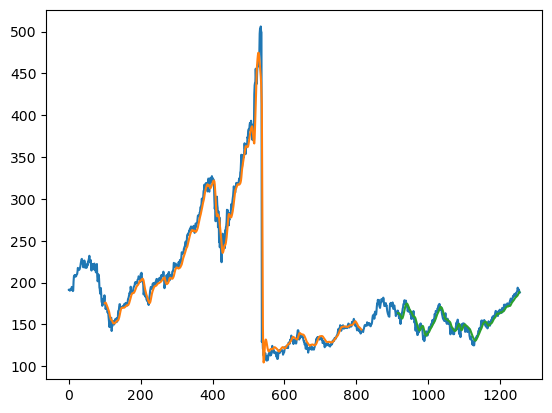

In [61]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [62]:
len(test_data)

440

In [63]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [64]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [65]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)


[0.20489736]
101
1 day input [0.11739512 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224
 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568
 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986
 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446
 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074
 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419
 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504
 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304 0.18219161 0.18126487 0.17778334 0.18467126
 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669
 0.19579211 0.19316218 0.20077646

In [66]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [67]:
import matplotlib.pyplot as plt
len(df1)

1256

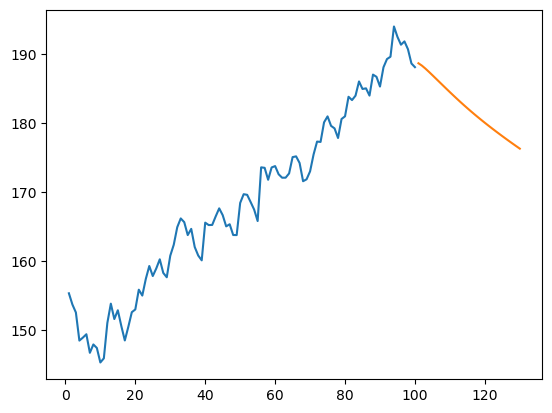

In [68]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

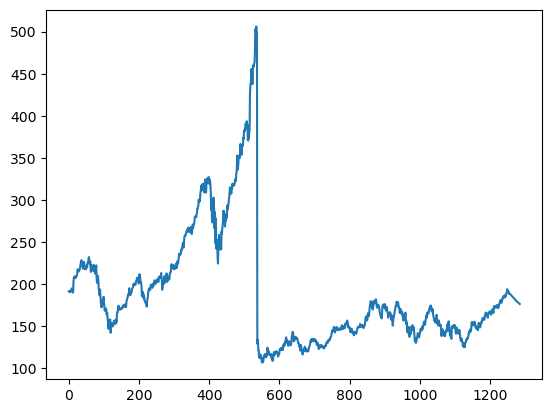

In [70]:
df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
plt.savefig('graph2.png')